In [19]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [25]:
df = pd.read_csv('final_df.csv')
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,title,year,country,language,duration,genre,director,production_company,description,budget,...,country_1,country_2,country_3,budget_USD,actor_1,listing_1,actor_2,listing_2,actor_3,listing_3
0,Psycho,1960,USA,English,109,"Horror, Mystery, Thriller",Alfred Hitchcock,Shamley Productions,A Phoenix secretary embezzles forty thousand d...,$ 806947,...,USA,NaN,NaN,806947.0,Anthony Perkins,D,Vera Miles,D,John Gavin,D
1,Spartacus,1960,USA,English,197,"Adventure, Biography, Drama",Stanley Kubrick,Bryna Productions,The slave Spartacus leads a violent revolt aga...,$ 12000000,...,USA,NaN,NaN,12000000.0,Kirk Douglas,D,Laurence Olivier,D,Jean Simmons,D
2,Swiss Family Robinson,1960,USA,English,126,"Adventure, Family",Ken Annakin,Walt Disney Productions,A Swiss family must survive being shipwrecked ...,$ 5000000,...,USA,NaN,NaN,5000000.0,John Mills,D,Dorothy McGuire,D,James MacArthur,D
3,One Hundred and One Dalmatians,1961,USA,English,79,"Animation, Adventure, Comedy","Clyde Geronimi, Hamilton Luske",Walt Disney Productions,When a litter of Dalmatian puppies are abducte...,$ 4000000,...,USA,NaN,NaN,4000000.0,Rod Taylor,D,J. Pat O'Malley,D,Betty Lou Gerson,D
4,Une femme est une femme,1961,"France, Italy",French,85,"Comedy, Drama, Romance",Jean-Luc Godard,Euro International Film (EIA),A French striptease artist is desperate to bec...,$ 160000,...,France,Italy,NaN,160000.0,Jean-Claude Brialy,D,Anna Karina,D,Jean-Paul Belmondo,D


In [26]:
df2 = df.dropna()
df2

,title,year,country,language,duration,genre,director,production_company,description,budget,...,country_1,country_2,country_3,budget_USD,actor_1,listing_1,actor_2,listing_2,actor_3,listing_3
13,Cleopatra,1963,"Switzerland, UK, USA",English,192,"Biography, Drama, History",Joseph L. Mankiewicz,Twentieth Century Fox,Queen Cleopatra VII of Egypt experiences both ...,$ 44000000,...,Switzerland,UK,USA,44000000.0,Elizabeth Taylor,D,Richard Burton,D,Rex Harrison,D
25,Doctor Zhivago,1965,"USA, Italy, UK, Liechtenstein","English, Russian, French",197,"Drama, Romance, War",David Lean,Metro-Goldwyn-Mayer (MGM),"The life of a Russian physician and poet who, ...",$ 11000000,...,USA,Italy,UK,11000000.0,Omar Sharif,D,Julie Christie,D,Geraldine Chaplin,D
56,Willy Wonka & the Chocolate Factory,1971,"USA, East Germany, West Germany","English, French, German, Italian",100,"Family, Fantasy, Musical",Mel Stuart,Wolper Pictures Ltd.,A poor but hopeful boy seeks one of the five c...,$ 3000000,...,USA,East Germany,West Germany,3000000.0,Gene Wilder,D,Jack Albertson,D,Peter Ostrum,D
126,Superman,1978,"USA, UK, Canada, Switzerland",English,143,"Action, Adventure, Drama",Richard Donner,Dovemead Films,An alien orphan is sent from his dying planet ...,$ 55000000,...,USA,UK,Canada,55000000.0,Marlon Brando,D,Gene Hackman,C,Christopher Reeve,D
162,Superman II,1980,"USA, UK, Canada","English, French, Russian",127,"Action, Adventure, Sci-Fi","Richard Lester, Richard Donner",Dovemead Films,Superman agrees to sacrifice his powers to sta...,$ 54000000,...,USA,UK,Canada,54000000.0,Gene Hackman,C,Christopher Reeve,D,Ned Beatty,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,Godzilla: King of the Monsters,2019,"Japan, Canada, USA","English, Japanese, Chinese, Spanish",132,"Action, Adventure, Fantasy",Michael Dougherty,Warner Bros.,The crypto-zoological agency Monarch faces off...,$ 170000000,...,Japan,Canada,USA,170000000.0,Kyle Chandler,D,Vera Farmiga,C,Millie Bobby Brown,D
4110,Dumbo,2019,"USA, UK, Australia, Canada","English, French",112,"Adventure, Family, Fantasy",Tim Burton,Walt Disney Pictures,"A young elephant, whose oversized ears enable ...",$ 170000000,...,USA,UK,Australia,170000000.0,Colin Farrell,A,Michael Keaton,A,Danny DeVito,B
4121,Terminator: Dark Fate,2019,"USA, Spain, Hungary","English, Spanish",128,"Action, Adventure, Sci-Fi",Tim Miller,Paramount Pictures,Sarah Connor and a hybrid cyborg human must pr...,$ 185000000,...,USA,Spain,Hungary,185000000.0,Linda Hamilton,D,Arnold Schwarzenegger,A,Mackenzie Davis,D
4139,Cold Pursuit,2019,"UK, Norway, Canada, USA, France, Germany","English, Vietnamese, Shoshoni",119,"Action, Crime, Drama",Hans Petter Moland,StudioCanal,A grieving snowplow driver seeks out revenge a...,$ 60000000,...,UK,Norway,Canada,60000000.0,Liam Neeson,A,Laura Dern,D,Micheál Richardson,D


In [37]:
y = df2['overall_eval']
target_names = ['bad','good']

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = df2[['budget_USD', 'usa_gross_income','duration','genre_1', 'genre_2', 'genre_3', 'country_1','country_2', 'country_3','director','production_company','listing_1', 'listing_2', 'listing_3','votes', 'male_avg_rating', 'female_avg_rating', 
         'reviews_from_users','reviews_from_critics','avg_rating_<18yrs', 'avg_rating_18-30yrs', 'avg_rating_30-45yrs', 'avg_rating_>45yrs']].apply(LabelEncoder().fit_transform)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [40]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.648
k: 3, Train/Test Score: 0.832/0.672
k: 5, Train/Test Score: 0.799/0.672
k: 7, Train/Test Score: 0.766/0.656
k: 9, Train/Test Score: 0.763/0.648
k: 11, Train/Test Score: 0.774/0.656
k: 13, Train/Test Score: 0.780/0.672
k: 15, Train/Test Score: 0.760/0.631
k: 17, Train/Test Score: 0.725/0.598
k: 19, Train/Test Score: 0.719/0.631


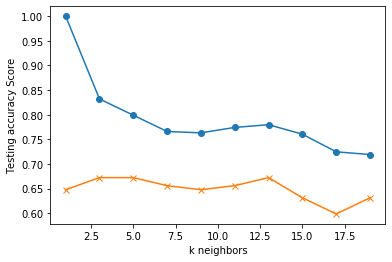

In [41]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Test Acc: 0.672


In [43]:
from sklearn.metrics import classification_report
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         bad       0.68      0.63      0.66        60
        good       0.67      0.71      0.69        62

    accuracy                           0.67       122
   macro avg       0.67      0.67      0.67       122
weighted avg       0.67      0.67      0.67       122

